<a href="https://www.kaggle.com/code/moazeldsokyx/restaurant-reviews-sentiment-analysis?scriptVersionId=138644713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Data Exploratory

In [2]:
data = pd.read_csv("/kaggle/input/restaurant-reviews/Restaurant Reviews.csv")
data

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2215,The staff was untrained and unfamiliar with th...,NaN
2216,The portions were skimpy and left us hungry. 0,NaN
2217,The restaurant had unclean restrooms and unple...,NaN
2218,The waiters were slow and forgetful with our o...,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2220 non-null   object 
 1   Liked   2117 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB


In [4]:
data.dropna(axis=0, inplace=True)

In [5]:
data.isna().sum()

Review    0
Liked     0
dtype: int64

In [6]:
data['Liked'].value_counts()

1.0    1099
0.0    1018
Name: Liked, dtype: int64

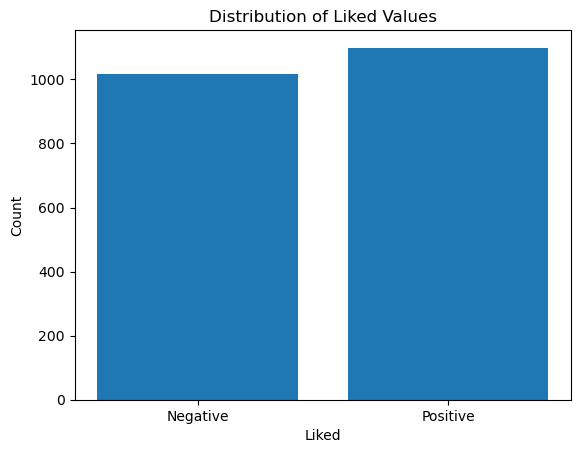

In [7]:

# Count the occurrences of each value in the 'Liked' column
value_counts = data['Liked'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Set x-labels
plt.xticks(value_counts.index, ['Positive', 'Negative'])

# Set labels and title
plt.xlabel('Liked')
plt.ylabel('Count')
plt.title('Distribution of Liked Values')

# Display the plot
plt.show()


Preprocessing Data (NLTK Text Data Cleaning)

In [8]:
test = data['Review'][0]


In [9]:
from nltk.corpus import stopwords


In [10]:
stopwords = set(stopwords.words("english"))

In [11]:
import re
test = re.sub('[^a-zA-Z]',' ', test)

In [12]:
test = test.lower().split()
test

['wow', 'loved', 'this', 'place']

In [13]:
for word in test:
    if word in stopwords:
        test.remove(word)
test

['wow', 'loved', 'place']

In [14]:
test = ' '.join(test)
print(type(test))

<class 'str'>


In [15]:
test

'wow loved place'

Steaming


In [16]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [17]:
ps = PorterStemmer()
ss = SnowballStemmer('english')
ls = LancasterStemmer()

In [18]:
test = ps.stem(test)
test

'wow loved plac'

In [19]:
test = ss.stem(test)
test

'wow loved plac'

In [20]:
test = ls.stem(test)
test

'wow loved plac'

CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer()

In [23]:
cv.fit_transform(test.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [24]:
test

'wow loved plac'

In [25]:
data.reset_index(drop=True, inplace=True)
corpus = []

for i in range(len(data)):
    test = data['Review'][i]
    test = re.sub('[^a-zA-Z]',' ', test)
    test = test.lower().split()
    for word in test:
        if word in stopwords:
            test.remove(word)
    test = ' '.join(test)
    test = ps.stem(test)
    corpus.append(test)
corpus[:5]

['wow loved plac',
 'crust not good',
 'tasty the texture just nasti',
 'stopped during late may bank holiday rick steve recommendation lov',
 'selection the menu great so the pric']

In [26]:
X = cv.fit_transform(corpus)
X.shape


(2117, 2408)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y = data['Liked']

In [29]:
print(X)

  (0, 2384)	1
  (0, 1227)	1
  (0, 1563)	1
  (1, 487)	1
  (1, 1400)	1
  (1, 889)	1
  (2, 2068)	1
  (2, 2092)	1
  (2, 2085)	1
  (2, 1130)	1
  (2, 1366)	1
  (3, 1990)	1
  (3, 638)	1
  (3, 1161)	1
  (3, 1277)	1
  (3, 154)	1
  (3, 994)	1
  (3, 1748)	1
  (3, 1981)	1
  (3, 1698)	1
  (3, 1225)	1
  (4, 2092)	2
  (4, 1828)	1
  (4, 1302)	1
  (4, 903)	1
  :	:
  (2112, 1596)	1
  (2112, 2243)	1
  (2112, 1174)	1
  (2112, 2232)	1
  (2112, 767)	1
  (2112, 1281)	1
  (2113, 1730)	1
  (2113, 567)	1
  (2113, 2225)	1
  (2113, 1414)	1
  (2113, 1734)	1
  (2114, 1896)	1
  (2114, 1459)	1
  (2114, 1445)	1
  (2114, 2297)	1
  (2114, 817)	1
  (2115, 811)	1
  (2115, 440)	1
  (2115, 2064)	1
  (2115, 1591)	1
  (2115, 274)	1
  (2116, 1730)	1
  (2116, 51)	1
  (2116, 392)	1
  (2116, 2237)	1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [32]:
LR = LogisticRegression()
MNB = MultinomialNB()
DT = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()


In [33]:
LR.fit(X_train,y_train)
MNB.fit(X_train,y_train)
DT.fit(X_train,y_train)
svc.fit(X_train,y_train)
rfc.fit(X_train, y_train)



RandomForestClassifier()

In [34]:
lr_pred = LR.predict(X_test)
MNB_pred = MNB.predict(X_test)
DT_pred = DT.predict(X_test)
svc_pred = svc.predict(X_test)
rfc_pred = rfc.predict(X_test)

Model Evaluation

In [35]:
from sklearn.metrics import classification_report, accuracy_score

In [36]:
lr_ev = classification_report(lr_pred, y_test)
print(lr_ev)

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       240
         1.0       0.84      0.94      0.89       226

    accuracy                           0.89       466
   macro avg       0.89      0.89      0.89       466
weighted avg       0.89      0.89      0.89       466



In [37]:
MNB_ev = classification_report(MNB_pred, y_test)
print(MNB_ev)

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       243
         1.0       0.83      0.93      0.88       223

    accuracy                           0.88       466
   macro avg       0.88      0.88      0.88       466
weighted avg       0.88      0.88      0.88       466



In [38]:
DT_ev = classification_report(DT_pred, y_test)
print(DT_ev)

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       252
         1.0       0.78      0.91      0.84       214

    accuracy                           0.84       466
   macro avg       0.84      0.84      0.84       466
weighted avg       0.85      0.84      0.84       466



In [39]:
svc_ev = classification_report(svc_pred, y_test)
print(svc_ev)

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88       265
         1.0       0.79      0.99      0.88       201

    accuracy                           0.88       466
   macro avg       0.89      0.89      0.88       466
weighted avg       0.90      0.88      0.88       466



In [40]:
rfc_ev = classification_report(rfc_pred, y_test)
print(rfc_ev)

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       262
         1.0       0.79      0.97      0.87       204

    accuracy                           0.87       466
   macro avg       0.88      0.88      0.87       466
weighted avg       0.89      0.87      0.87       466



Train the Logistic Regression model on all data

In [41]:
LR.fit(X,y)

LogisticRegression()

In [42]:
lr_pred = LR.predict(X)
lr_accuracy = accuracy_score(y, lr_pred)
print("Logistic Regression Training Accuracy:", round(lr_accuracy, 2))

Logistic Regression Training Accuracy: 0.99


Save Logistic Regression Model

In [43]:
import joblib
joblib.dump(LR, "LR_Model_Sentiment.pkl")

['LR_Model_Sentiment.pkl']

Test the model with new data

In [44]:

# Vectorize the test data
f = []
test1 = "The service was slow and the food was cold and tasteless"
#test1 = "The staff was incredibly friendly and the food was amazing"
test1 = re.sub('[^a-zA-Z]',' ', test1)
test1 = test1.lower().split()
for word in test1:
    if word in stopwords:
        test1.remove(word)
test1 = ' '.join(test1)
test1 = ps.stem(test1)
f.append(test1)
v = cv.transform(f)

# Use the trained model to make predictions
model = joblib.load("LR_Model_Sentiment.pkl")
model.predict(v)


array([0.])